# The Impact of Social Determinants of Health on Covid-19 Case Rates 

### Import data, remove unnecessary columns, and sort into dataframes by social determinants

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
case_rate_path = "Resources/covid19case_rate_by_social_det.csv"

# Read the mouse data and the study results
case_rate = pd.read_csv(case_rate_path)

In [2]:
# Display a preview from the social determinants of health
case_rate.head()

,date,social_det,social_tier,sort,cases_7dayavg_7daysago,population,case_rate_per_100k,state_case_rate_per_100k,case_rate_per_100k_30_days_ago,rate_diff_30_days
0,2023-01-01,income_cumulative,$60k - $80k,NaN,2.247823e+06,8630488,26045.143681,26997.831502,25521.326256,523.817425
1,2023-01-01,income_cumulative,$80k - $100k,NaN,1.278122e+06,5567034,22958.760446,26997.831502,22458.260539,500.499907
2,2023-01-01,income_cumulative,above $120K,NaN,4.710180e+05,2744855,17160.032133,26997.831502,16764.164227,395.867906
3,2023-01-01,income_cumulative,below $40K,NaN,2.252980e+06,7290434,30903.235665,26997.831502,30442.714384,460.521280
4,2023-01-01,income,above $120K,0.0,3.414286e+02,2744855,12.438856,15.048195,11.418766,1.020090


In [3]:
# Drop unncessary columns from dataset
case_rate = case_rate.drop(columns=["sort", "cases_7dayavg_7daysago", 
                             "population",
                             "state_case_rate_per_100k", 
                             "case_rate_per_100k_30_days_ago", 
                             "rate_diff_30_days"])
case_rate.head()

,date,social_det,social_tier,case_rate_per_100k
0,2023-01-01,income_cumulative,$60k - $80k,26045.143681
1,2023-01-01,income_cumulative,$80k - $100k,22958.760446
2,2023-01-01,income_cumulative,above $120K,17160.032133
3,2023-01-01,income_cumulative,below $40K,30903.235665
4,2023-01-01,income,above $120K,12.438856


In [4]:
# Determine all the social determinants in the dataset
case_rate.social_det.unique()

array(['income_cumulative', 'income', 'insurance', 'crowding'],
      dtype=object)

In [5]:
# Group case_rate by social determinants and view the data
grouped = [group for _, group in case_rate.groupby("social_det")]
grouped

[            date social_det   social_tier  case_rate_per_100k
 12    2022-11-27   crowding     10% - 15%           13.108560
 13    2022-11-27   crowding     15% - 20%           13.068887
 14    2022-11-27   crowding       2% - 5%           11.868938
 15    2022-11-27   crowding      5% - 10%           12.712180
 16    2022-11-27   crowding  less than 2%           10.786352
 ...          ...        ...           ...                 ...
 8017  2023-01-01   crowding     15% - 20%           15.857626
 8018  2023-01-01   crowding       2% - 5%           15.158523
 8019  2023-01-01   crowding      5% - 10%           16.057027
 8020  2023-01-01   crowding  less than 2%           14.068706
 8021  2023-01-01   crowding      over 20%           14.691394
 
 [2082 rows x 4 columns],
             date social_det    social_tier  case_rate_per_100k
 4     2023-01-01     income    above $120K           12.438856
 5     2023-01-01     income     below $40K           13.516734
 18    2022-11-27     in

In [6]:
# Put data into four datasets for each social determinant
crowding = grouped[0]
income = grouped[1]
income_cumulative_df = grouped[2]
insurance = grouped[3]

In [7]:
# View a sample from the crowding dataset
crowding.head(6)

,date,social_det,social_tier,case_rate_per_100k
12,2022-11-27,crowding,10% - 15%,13.108560
13,2022-11-27,crowding,15% - 20%,13.068887
14,2022-11-27,crowding,2% - 5%,11.868938
15,2022-11-27,crowding,5% - 10%,12.712180
16,2022-11-27,crowding,less than 2%,10.786352
17,2022-11-27,crowding,over 20%,11.231895


In [8]:
# View a sample from the income dataset
income.head(6)

,date,social_det,social_tier,case_rate_per_100k
4,2023-01-01,income,above $120K,12.438856
5,2023-01-01,income,below $40K,13.516734
18,2022-11-27,income,$100k - $120k,11.712117
19,2022-11-27,income,$40k - $60k,12.377717
20,2022-11-27,income,$60k - $80k,12.649508
21,2022-11-27,income,$80k - $100k,11.988944


In [9]:
# View a sample from the insurance dataset
insurance.head(6)

,date,social_det,social_tier,case_rate_per_100k
6,2023-01-01,insurance,10% - 15%,15.966100
7,2023-01-01,insurance,15% - 25%,15.937163
8,2023-01-01,insurance,25% - 35%,15.805350
9,2023-01-01,insurance,5% - 10%,14.893694
10,2023-01-01,insurance,less than 5%,12.434583
11,2023-01-01,insurance,over 35%,13.868449


In [10]:
# Find all insured tiers in insurance data_set
insurance["social_tier"].unique()

array(['10% - 15%', '15% - 25%', '25% - 35%', '5% - 10%', 'less than 5%',
       'over 35%'], dtype=object)

In [11]:
# Verify that each insured tier has the same amount of data
counts = insurance["social_tier"].value_counts()
print(counts)

10% - 15%       347
15% - 25%       347
25% - 35%       347
5% - 10%        347
less than 5%    347
over 35%        347
Name: social_tier, dtype: int64


### Create visualizations

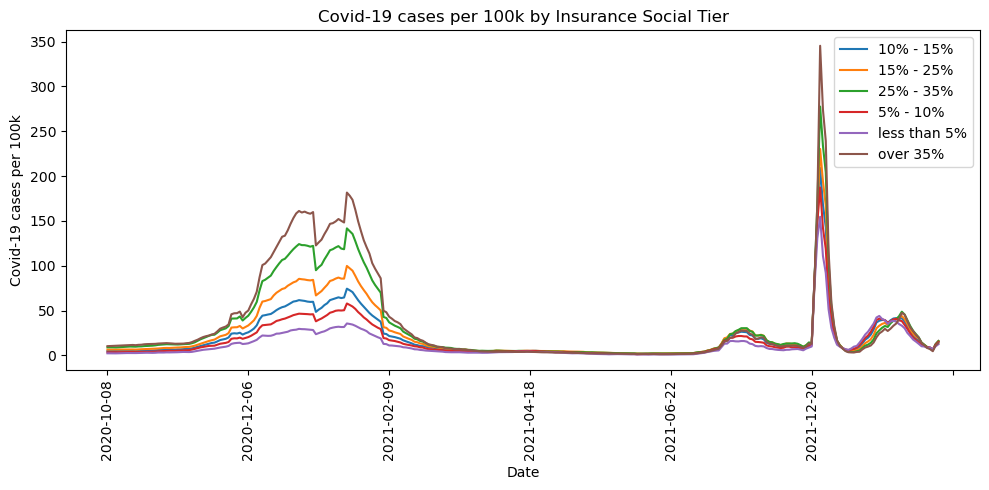

In [31]:
# Create a plot of insurance grouped by social_tier
grouped_ins = insurance.groupby(["social_tier", "date"])["case_rate_per_100k"].mean().reset_index()

# Create a line plot
fig, ax = plt.subplots(figsize=(10, 5))

for social_tier, data in grouped_ins.groupby("social_tier"):
    data.plot(x="date", y="case_rate_per_100k", label=social_tier, ax=ax)
    
# Set the x-axis label
ax.set_xlabel("Date")

# Set the y-axis label
ax.set_ylabel("Covid-19 cases per 100k")

# Set the title of the chart
ax.set_title("Covid-19 cases per 100k by Insurance Social Tier")

# Show the legend
ax.legend()

# Roate the x-ticks
plt.xticks(rotation = 90)

# Show the chart and save it to the Output directory
plt.tight_layout()
plt.savefig("Output/fig1.png")
plt.show()

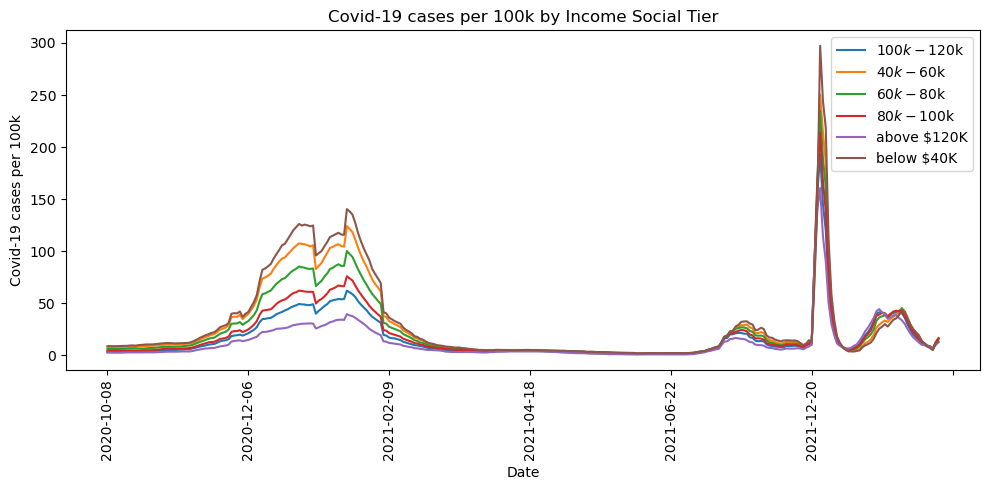

In [30]:
# Create a plot of income grouped by tier
grouped_inc = income.groupby(["social_tier", "date"])["case_rate_per_100k"].mean().reset_index()

# Create a line plot
fig, ax = plt.subplots(figsize=(10, 5))

for social_tier, data in grouped_inc.groupby("social_tier"):
    data.plot(x="date", y="case_rate_per_100k", label=social_tier, ax=ax)

# Set the x-axis label
ax.set_xlabel("Date")

# Set the y-axis label
ax.set_ylabel("Covid-19 cases per 100k")

# Set the title of the chart
ax.set_title("Covid-19 cases per 100k by Income Social Tier")

# Show the legend
ax.legend()

# Roate the x-ticks
plt.xticks(rotation = 90)

# Show the chart and save it to the Output directory
plt.tight_layout()
plt.savefig("Output/fig2.png")
plt.show()

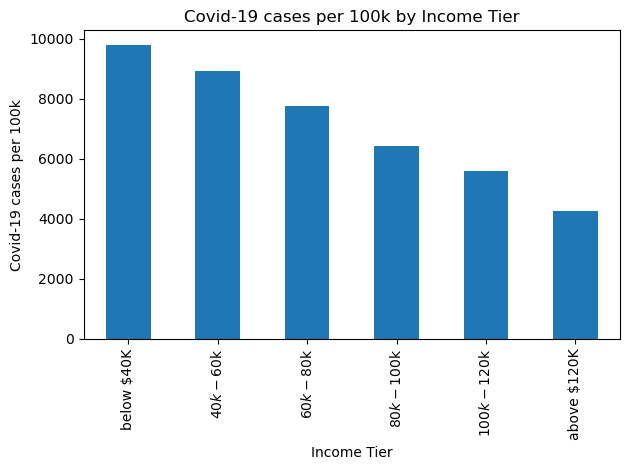

In [29]:
#Create a bar chart of income

# Group insurance by income tier
grouped_income = income.groupby("social_tier")
income_tier_cases = grouped_income["case_rate_per_100k"].sum()

# Sort the series 
income_tier_cases_sorted = income_tier_cases.reindex(index = ["below $40K", "$40k - $60k", "$60k - $80k", 
                                                "$80k - $100k", "$100k - $120k", "above $120K"])

# Create a bar chart
fig, ax = plt.subplots()

# Plot the tier_cases data
income_tier_cases_sorted.plot(kind="bar", ax=ax)

# Set the x-axis label
ax.set_xlabel("Income Tier")

# Set the y-axis label
ax.set_ylabel("Covid-19 cases per 100k")

# Set the title of the chart
ax.set_title("Covid-19 cases per 100k by Income Tier")

# Show the chart and save it to the Output directory
plt.tight_layout()
plt.savefig("Output/fig3.png")
plt.show()

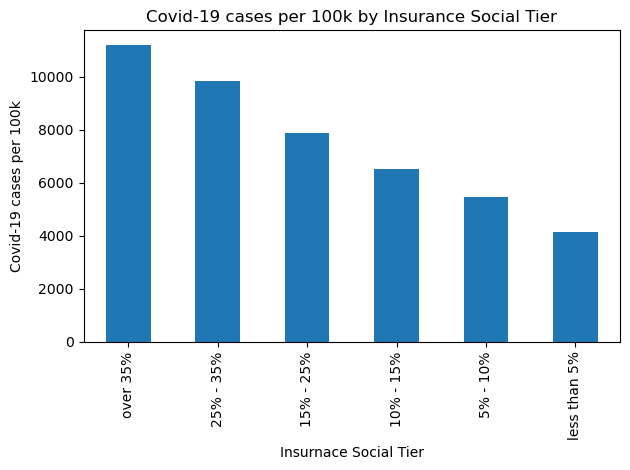

In [28]:
#Create a bar chart of insurance

# Group insurance by social_tier
grouped_insurance = insurance.groupby("social_tier")
ins_tier_cases = grouped_insurance["case_rate_per_100k"].sum()

# Sort the series 
grouped_insurance_sorted = ins_tier_cases.reindex(index = ["over 35%", "25% - 35%", "15% - 25%", 
                                                "10% - 15%", "5% - 10%", "less than 5%"])

# Create a bar chart
fig, ax = plt.subplots()

# Plot the tier_cases data
grouped_insurance_sorted.plot(kind="bar", ax=ax)

# Set the x-axis label
ax.set_xlabel("Insurnace Social Tier")

# Set the y-axis label
ax.set_ylabel("Covid-19 cases per 100k")

# Set the title of the chart
ax.set_title("Covid-19 cases per 100k by Insurance Social Tier")

# Show the chart and save it to the Output directory
plt.tight_layout()
plt.savefig("Output/fig4.png")
plt.show()

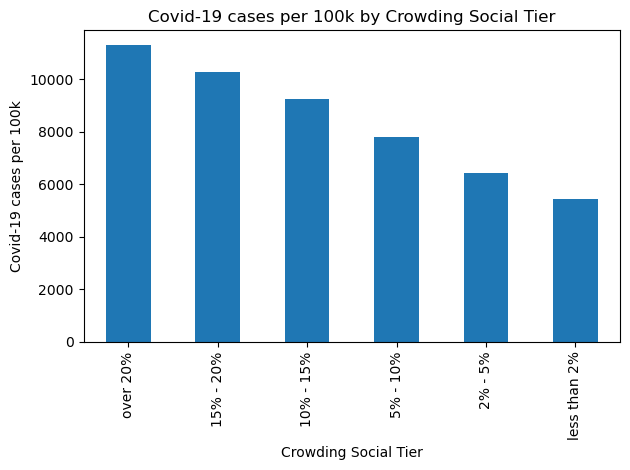

In [27]:
#Create a bar chart of crowding

# Group insurance by crowding tier
grouped_crowding = crowding.groupby("social_tier")
crowd_tier_cases = grouped_crowding["case_rate_per_100k"].sum()

# Sort the series 
crowd_tier_cases_sorted = crowd_tier_cases.reindex(index = ["over 20%", "15% - 20%", 
                                                            "10% - 15%", "5% - 10%",
                                                            "2% - 5%", "less than 2%"])

# Create a bar chart
fig, ax = plt.subplots()

# Plot the tier_cases data
crowd_tier_cases_sorted.plot(kind="bar", ax=ax)

# Set the x-axis label
ax.set_xlabel("Crowding Social Tier")

# Set the y-axis label
ax.set_ylabel("Covid-19 cases per 100k")

# Set the title of the chart
ax.set_title("Covid-19 cases per 100k by Crowding Social Tier")

# Show the chart and save it to the Output directory
plt.tight_layout()
plt.savefig("Output/fig5.png")
plt.show()

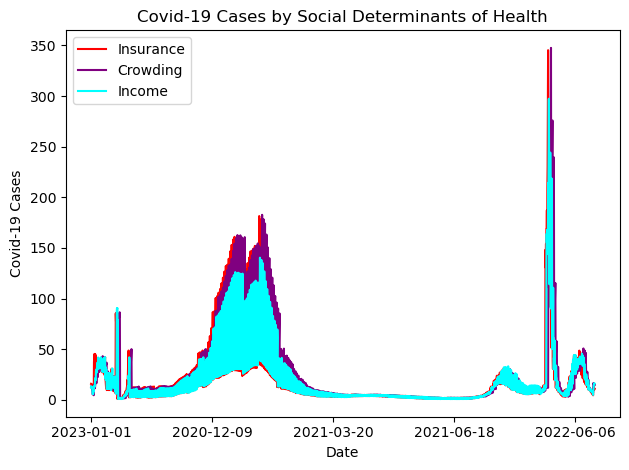

In [26]:
# Plot of Covid-19 case rate for income, crowding, and insurance social determinants

ax1 = insurance.plot(kind="line", x="date", y="case_rate_per_100k", label="Insurance", color="red")    
ax2 = crowding.plot(kind="line", x="date", y="case_rate_per_100k", color="purple", label="Crowding", ax=ax1)    
ax3 = income.plot(kind="line", x="date", y="case_rate_per_100k", color="cyan", label="Income", ax=ax1)

# Set the x-axis label
ax1.set_xlabel("Date")

# Set the y-axis label
ax1.set_ylabel("Covid-19 Cases")

# Set the title of the chart
ax1.set_title("Covid-19 Cases by Social Determinants of Health")

# Show the chart and save it to the Output directory
plt.tight_layout()
plt.savefig("Output/fig6.png")
plt.show()

### PLACEHOLDER FOR ANALYSIS